# Install necessary packages

In [266]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [267]:
!pip install -U torch numpy==1.26 pandas scikit-learn plotly nltk transformers==4.46.3 sentence-transformers einops datasets gradio networkx umap-learn ipywidgets matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [268]:
import os
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from sklearn.manifold import TSNE
from IPython.display import display
import matplotlib.pyplot as plt
import umap
import plotly
from IPython.display import display, HTML
# Tomas Mazak's workaround
plotly.offline.init_notebook_mode()
display(HTML(
"""
<script type="text/javascript" async
src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-M">
"""

))
##


# Download NLTK resources

In [269]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the CSV files to inspect their contents

In [270]:
current_dir = os.path.join(os.getcwd(), 'data')

In [271]:
program_df = pd.read_csv(os.path.join(current_dir, 'Program.csv'))
program_df['title'] = program_df['title'].str.replace(r'<[^>]*>', '', regex=True)
program_course_df = pd.read_csv(os.path.join(current_dir, 'ProgramCourse.csv'))
program_type_df = pd.read_csv(os.path.join(current_dir, 'ProgramType.csv'))
course_df = pd.read_csv(os.path.join(current_dir, 'Course.csv'))

# Inspect the DataFrames

In [272]:
print("Program DataFrame Head:")
program_df['title'] = program_df['title'].str.replace(r'<[^>]*>', '', regex=True)
display(program_df.head(200))


Program DataFrame Head:


code                                  credits  horaireCoursPdfJson  \
0   0648                               15 crédits                  NaN   
1   0569                               15 crédits                  NaN   
2   0514                               15 crédits                  NaN   
3   3294                               30 crédits                  NaN   
4   6646  90 crédits, incluant 9 crédits de stage                  NaN   
..   ...                                      ...                  ...   
89  1682                               30 crédits                  NaN   
90  3209                               30 crédits                  NaN   
91  0854                               15 crédits                  NaN   
92  9081                               15 crédits                  NaN   
93  0682                               15 crédits                  NaN   

    planificationPdfJson                createdAt                updatedAt  \
0                    NaN  2024-10-17 04:32:25.190  2024-11-02 01:50:20.409   
1                    NaN  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
2                    NaN  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
3                    NaN  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
4                    NaN  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
..                   ...                      ...                      ...   
89                   NaN  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
90                   NaN  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
91                   NaN  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
92                   NaN  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
93                   NaN  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   

                                                title  \
0   Programme court de 2e cycle en génie de l'envi...   
1   Programme court de 2e cycle en génie de la pro...   
2   Programme court de 2e cycle en gestion de l’in...   
3   DESS en projets internationaux et ingénierie g...   
4             Baccalauréat en informatique distribuée   
..                                                ...   
89  DESS en génie des risques de santé et sécurité...   
90  DESS en génie de la production automatisée : i...   
91  Programme court de 2e cycle en génie de la con...   
92  Programme court de 2e cycle en ingénierie fina...   
93  Programme court de 2e cycle en génie des risqu...   

                                                  url  cycle      id  
0   https://www.etsmtl.ca/programmes-formations/pr...      2  183146  
1   https://www.etsmtl.ca/programmes-formations/pr...      2  183156  
2   https://www.etsmtl.ca/programmes-formations/pr...      2  183236  
3   https://www.etsmtl.ca/programmes-formations/de...      2  183498  
4   https://www.etsmtl.ca/programmes-formations/ba...      1  182928  
..                                                ...    ...     ...  
89  https://www.etsmtl.ca/programmes-formations/de...      2  183424  
90  https://www.etsmtl.ca/programmes-formations/de...      2  183404  
91  https://www.etsmtl.ca/programmes-formations/pr...      2  183136  
92  https://www.etsmtl.ca/programmes-formations/pr...      2  183276  
93  https://www.etsmtl.ca/programmes-formations/pr...      2  183176  

[94 rows x 10 columns]

In [273]:
print("\nProgramCourse DataFrame Head:")
display(program_course_df.head())


ProgramCourse DataFrame Head:


createdAt                updatedAt  typicalSessionIndex  \
0  2024-11-02 01:50:21.887  2024-11-02 01:50:21.887                    1   
1  2024-11-02 01:50:21.913  2024-11-02 01:50:21.913                    3   
2  2024-11-02 01:50:21.958  2024-11-02 01:50:21.958                    4   
3  2024-11-02 01:50:21.973  2024-11-02 01:50:21.973                    4   
4  2024-11-02 01:50:21.981  2024-11-02 01:50:21.981                    5   

   courseId  programId   type  
0    351029     183256    NaN  
1    353404     183040  TRONC  
2    352245     182976  TRONC  
3    351827     182976  TRONC  
4    353458     182976  TRONC

In [274]:
print("\nProgramType DataFrame Head:")
display(program_type_df.head())


ProgramType DataFrame Head:


id                                      title
0  697435                       Maîtrise avec projet
1  738239                             Microprogramme
2  697451                      Maîtrise avec mémoire
3  915770  Concentration en technologies de la santé
4  697388                                   Doctorat

In [275]:
print("\nCourse DataFrame Head:")
display(course_df.head())


Course DataFrame Head:


code                                              title  \
0  ATE800E       Academic Integrity : Concepts and Techniques   
1   ELE735                                  Analyse numérique   
2   MTI850                   Analytiques des données massives   
3   CHM015  Chimie préparatoire pour le génie (hors progra...   
4   ELE752                            Appareillage électrique   

                                         description  credits  \
0  The ATE800 workshop must be passed in the firs...        0   
1  Au terme de ce cours, l'étudiante ou l'étudian...        3   
2  Ce cours présente les concepts pour effectuer ...        3   
3  Ce cours vise à initier l’étudiante ou l'étudi...        3   
4  Au terme de ce cours, l'étudiante ou l'étudian...        3   

                 createdAt                updatedAt      id  cycle  
0  2024-11-02 01:50:21.499  2024-11-02 01:50:21.569  407641      2  
1  2024-11-02 01:50:21.502  2024-11-02 01:50:21.773  350543      1  
2  2024-11-02 01:50:21.502  2024-11-02 01:50:21.773  353344      2  
3  2024-11-02 01:50:21.503  2024-11-02 01:50:21.773  349708      1  
4  2024-11-02 01:50:21.502  2024-11-02 01:50:21.773  350599      1

In [276]:
print("\nDataFrame Columns:")
print("Program:", program_df.columns.tolist())
print("ProgramCourse:", program_course_df.columns.tolist())
print("ProgramType:", program_type_df.columns.tolist())
print("Course:", course_df.columns.tolist())


DataFrame Columns:
Program: ['code', 'credits', 'horaireCoursPdfJson', 'planificationPdfJson', 'createdAt', 'updatedAt', 'title', 'url', 'cycle', 'id']
ProgramCourse: ['createdAt', 'updatedAt', 'typicalSessionIndex', 'courseId', 'programId', 'type']
ProgramType: ['id', 'title']
Course: ['code', 'title', 'description', 'credits', 'createdAt', 'updatedAt', 'id', 'cycle']


# How many courses are in the dataset?

In [277]:
num_courses = course_df.shape[0]
print(f"Number of courses in the dataset: {num_courses}")

Number of courses in the dataset: 907


# How many program are in the dataset?

In [278]:
num_programs = program_df.shape[0]
print(f"Number of programs in the dataset: {num_programs}")

Number of programs in the dataset: 94


In [279]:
num_program_courses = program_course_df.shape[0]
print(f"Number of program courses in the dataset: {num_program_courses}")

Number of program courses in the dataset: 692


In [280]:
num_program_courses = program_course_df.shape[0]
print(f"Number of program courses in the dataset: {num_program_courses}")

Number of program courses in the dataset: 692


In [281]:
num_program_types = program_type_df.shape[0]
print(f"Number of program types in the dataset: {num_program_types}")

Number of program types in the dataset: 10


# Combine the Program and ProgramCourse DataFrames

In [282]:
# Ensure consistent data types for merge keys
program_course_df['courseId'] = program_course_df['courseId'].astype(str)
course_df['id'] = course_df['id'].astype(str)

program_course_df['programId'] = program_course_df['programId'].astype(str)
program_df['id'] = program_df['id'].astype(str)

# Merge DataFrames with suffixes to differentiate columns

In [283]:
combined_df = pd.merge(
    program_course_df,
    program_df,
    left_on='programId',
    right_on='id',
    how='left',
    suffixes=('_program_course', '_program')
)

# Print columns after first merge
print("Columns after merging program_course_df and program_df:")
print(combined_df.columns.tolist())


Columns after merging program_course_df and program_df:
['createdAt_program_course', 'updatedAt_program_course', 'typicalSessionIndex', 'courseId', 'programId', 'type', 'code', 'credits', 'horaireCoursPdfJson', 'planificationPdfJson', 'createdAt_program', 'updatedAt_program', 'title', 'url', 'cycle', 'id']


# Merge with course_df

In [284]:
combined_df = pd.merge(
    combined_df,
    course_df,
    left_on='courseId',
    right_on='id',
    how='left',
    suffixes=('', '_course')
)


# Print columns after second merge

In [285]:
print("Columns after merging with course_df:")
print(combined_df.columns.tolist())

Columns after merging with course_df:
['createdAt_program_course', 'updatedAt_program_course', 'typicalSessionIndex', 'courseId', 'programId', 'type', 'code', 'credits', 'horaireCoursPdfJson', 'planificationPdfJson', 'createdAt_program', 'updatedAt_program', 'title', 'url', 'cycle', 'id', 'code_course', 'title_course', 'description', 'credits_course', 'createdAt', 'updatedAt', 'id_course', 'cycle_course']


# Optional: Rename columns for clarity

In [286]:
combined_df.rename(columns={
    'title': 'title_program',
    'code': 'code_program',
    'cycle': 'cycle_program',
    'credits': 'credits_program',
    'horaireCoursPdfJson': 'horaireCoursPdfJson_program',
    'title_course': 'title_course',
    'code_course': 'code_course',
    'cycle_course': 'cycle_course',
    'credits_course': 'credits_course',
    'description': 'description_course'
}, inplace=True)


# Updated list of columns to include in the combined text

In [287]:
columns_to_include = [
    'programId', 'courseId', 'type',
    'title_program', 'code_program', 'cycle_program', 'credits_program', 'horaireCoursPdfJson_program',
    'title_course', 'code_course', 'cycle_course', 'credits_course', 'description_course'
]


# Drop createdAt_program_course updatedAt_program_course horaireCoursPdfJson_program planificationPdfJson

In [288]:

columns_to_drop = [
    'createdAt_program_course', 
    'updatedAt_program_course', 
    'horaireCoursPdfJson', 
    'planificationPdfJson'
]

combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Find all the courses for each program

In [289]:
courses_per_program = combined_df.groupby('programId').agg({
    'title_course': list,  # Course titles
    'title_program': 'first'  # Program title
}).reset_index()

In [290]:
courses_per_program.rename(columns={'title': 'course_titles', 'title_program': 'program_title'}, inplace=True)
courses_per_program

programId                                       title_course  \
0     182816  [Éléments de gestion de projets de constructio...   
1     182848  [Calcul différentiel et intégral, Statique et ...   
2     182864  [Règles de base en santé et sécurité, Développ...   
3     182880  [Comportement organisationnel et performance d...   
4     182896  [Calcul différentiel et intégral, Règles de ba...   
5     182912  [Calcul différentiel et intégral, Développemen...   
6     182952  [Intégrité intellectuelle, Règles de base en s...   
7     182960  [Règles de base en santé et sécurité, Intégrit...   
8     182976  [Gestion des actifs immobiliers, Gestion du pe...   
9     182984  [Intégrité intellectuelle, Informatique et sta...   
10    182992  [Intégrité intellectuelle, Règles de base en s...   
11    183000  [Intégrité intellectuelle, Règles de base en s...   
12    183008  [Intégrité intellectuelle, Règles de base en s...   
13    183016  [Intégrité intellectuelle, Règles de base en s...   
14    183024  [Intégrité intellectuelle, Règles de base en s...   
15    183032  [Intégrité intellectuelle, Règles de base en s...   
16    183040          [Comptabilité et finances en maintenance]   
17    183086  [Sujets spéciaux : projets internationaux et i...   
18    183126  [Fondements de la transformation numérique en ...   
19    183136  [Intégrité intellectuelle : un savoir-être et ...   
20    183166  [Vision par ordinateur, Sujets spéciaux I en g...   
21    183176  [Intégrité intellectuelle : un savoir-être et ...   
22    183186  [Réseaux de neurones et systèmes flous, Vision...   
23    183206  [Intégrité intellectuelle : un savoir-être et ...   
24    183216  [Intégrité intellectuelle : un savoir-être et ...   
25    183256  [Aspects contractuels des projets internationa...   
26    183276  [Intégrité intellectuelle : un savoir-être et ...   
27    183286  [Intégration des pratiques de gestion de l’inn...   
28    183306  [Intégrité intellectuelle : un savoir-être et ...   
29    183324  [Compléments de mathématiques (profil génie mé...   
30    183344  [Modélisation énergétique (6D) et gestion (7D)...   
31    183354  [Commande par micro-ordinateur, Systèmes de me...   
32    183364  [Fabrication additive de composants à forte va...   
33    183384  [Intégrité intellectuelle : un savoir-être et ...   
34    183394  [Fondements des procédés et processus en génie...   
35    183404  [Gestion de projets dans les produits et servi...   
36    183414  [Gestion de projets dans les produits et servi...   
37    183424  [Ergonomie et sécurité en milieu industriel, É...   
38    183464                [Introduction à l’entrepreneurship]   
39    183508  [Signaux et systèmes numériques, Processeur nu...   
40    183528  [Surfaces discrètes : représentation, algorith...   
41    183738  [Sujets spéciaux II en génie mécanique, Sujets...   
42    391265  [Intégrité intellectuelle : un savoir-être et ...   
43    396036  [Intégrité intellectuelle : un savoir-être et ...   

                                        program_title  
0            Baccalauréat en génie de la construction  
1                      Baccalauréat en génie logiciel  
2                     Baccalauréat en génie mécanique  
3   Baccalauréat en génie des opérations et de la ...  
4   Baccalauréat en génie de la production automat...  
5   Baccalauréat en génie des technologies de l'in...  
6   Certificat en économie et estimation des proje...  
7    Certificat en gestion et assurance de la qualité  
8                   Certificat en gestion immobilière  
9               Certificat en production industrielle  
10                   Certificat en télécommunications  
11           Programme court en amélioration continue  
12  Programme court en économie et estimation des ...  
13             Programme court en gestion immobilière  
14            Programme court en gestion industrielle  
15  Programme court en optimisation de la producti...  
16  Programme court en planificatio

# How course per program for each program

In [291]:
# for each programId, count the number of courses title_coursein the list
courses_per_program['num_courses'] = courses_per_program['title_course'].apply(len)
courses_per_program

programId                                       title_course  \
0     182816  [Éléments de gestion de projets de constructio...   
1     182848  [Calcul différentiel et intégral, Statique et ...   
2     182864  [Règles de base en santé et sécurité, Développ...   
3     182880  [Comportement organisationnel et performance d...   
4     182896  [Calcul différentiel et intégral, Règles de ba...   
5     182912  [Calcul différentiel et intégral, Développemen...   
6     182952  [Intégrité intellectuelle, Règles de base en s...   
7     182960  [Règles de base en santé et sécurité, Intégrit...   
8     182976  [Gestion des actifs immobiliers, Gestion du pe...   
9     182984  [Intégrité intellectuelle, Informatique et sta...   
10    182992  [Intégrité intellectuelle, Règles de base en s...   
11    183000  [Intégrité intellectuelle, Règles de base en s...   
12    183008  [Intégrité intellectuelle, Règles de base en s...   
13    183016  [Intégrité intellectuelle, Règles de base en s...   
14    183024  [Intégrité intellectuelle, Règles de base en s...   
15    183032  [Intégrité intellectuelle, Règles de base en s...   
16    183040          [Comptabilité et finances en maintenance]   
17    183086  [Sujets spéciaux : projets internationaux et i...   
18    183126  [Fondements de la transformation numérique en ...   
19    183136  [Intégrité intellectuelle : un savoir-être et ...   
20    183166  [Vision par ordinateur, Sujets spéciaux I en g...   
21    183176  [Intégrité intellectuelle : un savoir-être et ...   
22    183186  [Réseaux de neurones et systèmes flous, Vision...   
23    183206  [Intégrité intellectuelle : un savoir-être et ...   
24    183216  [Intégrité intellectuelle : un savoir-être et ...   
25    183256  [Aspects contractuels des projets internationa...   
26    183276  [Intégrité intellectuelle : un savoir-être et ...   
27    183286  [Intégration des pratiques de gestion de l’inn...   
28    183306  [Intégrité intellectuelle : un savoir-être et ...   
29    183324  [Compléments de mathématiques (profil génie mé...   
30    183344  [Modélisation énergétique (6D) et gestion (7D)...   
31    183354  [Commande par micro-ordinateur, Systèmes de me...   
32    183364  [Fabrication additive de composants à forte va...   
33    183384  [Intégrité intellectuelle : un savoir-être et ...   
34    183394  [Fondements des procédés et processus en génie...   
35    183404  [Gestion de projets dans les produits et servi...   
36    183414  [Gestion de projets dans les produits et servi...   
37    183424  [Ergonomie et sécurité en milieu industriel, É...   
38    183464                [Introduction à l’entrepreneurship]   
39    183508  [Signaux et systèmes numériques, Processeur nu...   
40    183528  [Surfaces discrètes : représentation, algorith...   
41    183738  [Sujets spéciaux II en génie mécanique, Sujets...   
42    391265  [Intégrité intellectuelle : un savoir-être et ...   
43    396036  [Intégrité intellectuelle : un savoir-être et ...   

                                        program_title  num_courses  
0            Baccalauréat en génie de la construction           64  
1                      Baccalauréat en génie logiciel           59  
2                     Baccalauréat en génie mécanique           81  
3   Baccalauréat en génie des opérations et de la ...           51  
4   Baccalauréat en génie de la production automat...           67  
5   Baccalauréat en génie des technologies de l'in...           62  
6   Certificat en économie et estimation des proje...           13  
7    Certificat en gestion et assurance de la qualité           17  
8                   Certificat en gestion immobilière            3  
9               Certificat en production industrielle           15  
10                   Certificat en télécommunications           12  
11           Programme court en amélioration continue            7  
12  Programme court en économie et estimation des ...           13  
13             Progra

In [292]:
dess_programs = courses_per_program[courses_per_program['program_title'].str.contains("DESS", case=False, na=False)]

In [293]:
dess_programs

programId                                       title_course  \
30    183344  [Modélisation énergétique (6D) et gestion (7D)...   
31    183354  [Commande par micro-ordinateur, Systèmes de me...   
32    183364  [Fabrication additive de composants à forte va...   
33    183384  [Intégrité intellectuelle : un savoir-être et ...   
34    183394  [Fondements des procédés et processus en génie...   
35    183404  [Gestion de projets dans les produits et servi...   
36    183414  [Gestion de projets dans les produits et servi...   
37    183424  [Ergonomie et sécurité en milieu industriel, É...   
38    183464                [Introduction à l’entrepreneurship]   
39    183508  [Signaux et systèmes numériques, Processeur nu...   
40    183528  [Surfaces discrètes : représentation, algorith...   

                                        program_title  num_courses  
30              DESS en BIM et innovations numériques            7  
31  DESS en énergies renouvelables et efficacité é...            5  
32                       DESS en entreprise numérique            2  
33  DESS en génie de la construction : gestion de ...           16  
34                   DESS en génie de l'environnement            3  
35  DESS en génie de la production automatisée : i...           10  
36  DESS en génie de la production automatisée : s...           10  
37  DESS en génie des risques de santé et sécurité...            4  
38                    DESS en gestion de l’innovation            1  
39              DESS en réseaux de télécommunications            3  
40              DESS en technologies de l'information           10

In [294]:
bachelor_programs_classes = courses_per_program[courses_per_program['program_title'].str.contains("Baccalauréat", case=False, na=False)]

In [295]:
bachelor_programs_classes

programId                                       title_course  \
0    182816  [Éléments de gestion de projets de constructio...   
1    182848  [Calcul différentiel et intégral, Statique et ...   
2    182864  [Règles de base en santé et sécurité, Développ...   
3    182880  [Comportement organisationnel et performance d...   
4    182896  [Calcul différentiel et intégral, Règles de ba...   
5    182912  [Calcul différentiel et intégral, Développemen...   

                                       program_title  num_courses  
0           Baccalauréat en génie de la construction           64  
1                     Baccalauréat en génie logiciel           59  
2                    Baccalauréat en génie mécanique           81  
3  Baccalauréat en génie des opérations et de la ...           51  
4  Baccalauréat en génie de la production automat...           67  
5  Baccalauréat en génie des technologies de l'in...           62

In [296]:
master_programs_classes = courses_per_program[courses_per_program['program_title'].str.contains("Maîtrise", case=False, na=False)]
master_programs_classes

Empty DataFrame
Columns: [programId, title_course, program_title, num_courses]
Index: []

In [297]:
doctorate_programs_classes = courses_per_program[courses_per_program['program_title'].str.contains("Doctorat", case=False, na=False)]

In [298]:
doctorate_programs_classes

programId                                       title_course  \
41    183738  [Sujets spéciaux II en génie mécanique, Sujets...   

        program_title  num_courses  
41  Doctorat en génie            2

In [299]:
# Show all the micro programs
micro_programs = program_df[program_df['title'].str.contains('Micro')]
micro_programs

code    credits  horaireCoursPdfJson  planificationPdfJson  \
54  9159  9 crédits                  NaN                   NaN   
73  0845  9 crédits                  NaN                   NaN   
78  9183  9 crédits                  NaN                   NaN   

                  createdAt                updatedAt  \
54  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
73  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
78  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   

                                                title  \
54  Microprogramme de 2e cycle en ingénierie créative   
73  Microprogramme de 2e cycle en innovation en ch...   
78  Microprogramme de 2e cycle en entrepreneuriat ...   

                                                  url  cycle      id  
54  https://www.etsmtl.ca/programmes-formations/mi...      2  396036  
73  https://www.etsmtl.ca/programmes-formations/mi...      2  183286  
78  https://www.etsmtl.ca/programmes-formations/mi...      2  391265

In [300]:
# how many programs are in the dataset
micro_programs.shape[0]

3

In [301]:
# Show all the court programs
court_programs = program_df[program_df['title'].str.contains('court')]
court_programs

code     credits  horaireCoursPdfJson  planificationPdfJson  \
0   0648  15 crédits                  NaN                   NaN   
1   0569  15 crédits                  NaN                   NaN   
2   0514  15 crédits                  NaN                   NaN   
7   0414  15 crédits                  NaN                   NaN   
10  0628  15 crédits                  NaN                   NaN   
12  0565  15 crédits                  NaN                   NaN   
13  0866  15 crédits                  NaN                   NaN   
14  0578  15 crédits                  NaN                   NaN   
15  0560  15 crédits                  NaN                   NaN   
17  0489  15 credits                  NaN                   NaN   
19  0563  15 crédits                  NaN                   NaN   
20  0856  15 crédits                  NaN                   NaN   
21  0567  15 crédits                  NaN                   NaN   
22  0616  15 crédits                  NaN                   NaN   
23  0486  15 crédits                  NaN                   NaN   
31  0987  15 crédits                  NaN                   NaN   
36  0495  15 crédits                  NaN                   NaN   
38  0497  15 crédits                  NaN                   NaN   
39  0617  15 crédits                  NaN                   NaN   
40  0534  15 crédits                  NaN                   NaN   
41  0557  15 crédits                  NaN                   NaN   
42  0562  15 crédits                  NaN                   NaN   
43  0681  15 crédits                  NaN                   NaN   
44  9632  15 credits                  NaN                   NaN   
45  0647  15 crédits                  NaN                   NaN   
47  0649  15 crédits                  NaN                   NaN   
48  9684  15 crédits                  NaN                   NaN   
49  0496  15 crédits                  NaN                   NaN   
79  9038  15 crédits                  NaN                   NaN   
80  0857  15 crédits                  NaN                   NaN   
81  0858  15 crédits                  NaN                   NaN   
82  0561  15 crédits                  NaN                   NaN   
91  0854  15 crédits                  NaN                   NaN   
92  9081  15 crédits                  NaN                   NaN   
93  0682  15 crédits                  NaN                   NaN   

                  createdAt                updatedAt  \
0   2024-10-17 04:32:25.190  2024-11-02 01:50:20.409   
1   2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
2   2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
7   2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
10  2024-10-17 04:32:25.189  2024-11-02 01:50:20.409   
12  2024-10-17 04:32:25.189  2024-11-02 01:50:20.409   
13  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
14  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
15  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
17  2024-10-17 04:32:25.193  2024-11-02 01:50:20.410   
19  2024-10-17 04:32:25.190  2024-11-02 01:50:20.409   
20  2024-10-17 04:32:25.190  2024-11-02 01:50:20.409   
21  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
22  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
23  2024-10-17 04:32:25.193  2024-11-02 01:50:20.409   
31  2024-10-17 04:32:25.193  2024-11-02 01:50:20.409   
36  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
38  2024-10-17 04:32:25.193  2024-11-02 01:50:20.409   
39  2024-10-17 04:32:25.190  2024-11-02 01:50:20.409   
40  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
41  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
42  2024-10-17 04:32:25.191  2024-11-02 01:50:20.409   
43  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
44  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
45  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
47  2024-10-17 04:32:25.192  2024-11-02 01:50:20.409   
48  2024-10-17 04:32:25.193  2024-11-02 01:50:20.409   
49  2024-10-17 04:32:25

In [302]:
# how many programs are in the dataset
court_programs.shape[0]

35

In [303]:
bachelor_programs = program_df[program_df['title'].str.contains('Baccalauréat')]
bachelor_programs

code                                            credits  \
4   6646            90 crédits, incluant 9 crédits de stage   
6   7694  Entre 115 et 120 crédits de cours (selon le pr...   
11   NaN  91 crédits. Durée : 2 ans et 4 mois (un total ...   
32  6556  Entre 117 et 118 crédits de cours (selon le pr...   
35  7084  116 crédits de cours et 27 crédits de stage (h...   
59  7086  116 crédits de cours et 27 crédits de stage (h...   
69  7684  115 crédits de cours et 27 crédits de stage (h...   
77   NaN  118 à 120 crédits, dépendamment du choix de co...   
84  7625  118 crédits de cours (selon le profil d'accuei...   
85  6557  118 ou 119 crédits de cours (selon le profil d...   

    horaireCoursPdfJson  planificationPdfJson                createdAt  \
4                   NaN                   NaN  2024-10-17 04:32:25.184   
6                   NaN                   NaN  2024-10-17 04:32:25.184   
11                  NaN                   NaN  2024-10-17 04:32:25.184   
32                  NaN                   NaN  2024-10-17 04:32:25.184   
35                  NaN                   NaN  2024-10-17 04:32:25.184   
59                  NaN                   NaN  2024-10-17 04:32:25.184   
69                  NaN                   NaN  2024-10-17 04:32:25.184   
77                  NaN                   NaN  2024-10-17 04:32:25.184   
84                  NaN                   NaN  2024-10-17 04:32:25.184   
85                  NaN                   NaN  2024-10-17 04:32:25.184   

                  updatedAt  \
4   2024-11-02 01:50:20.408   
6   2024-11-02 01:50:20.408   
11  2024-11-02 01:50:20.408   
32  2024-11-02 01:50:20.408   
35  2024-11-02 01:50:20.408   
59  2024-11-02 01:50:20.408   
69  2024-11-02 01:50:20.408   
77  2024-11-02 01:50:20.408   
84  2024-11-02 01:50:20.408   
85  2024-11-02 01:50:20.408   

                                                title  \
4             Baccalauréat en informatique distribuée   
6                    Baccalauréat en génie électrique   
11  Baccalauréat en design d'expérience utilisateu...   
32  Baccalauréat en génie des opérations et de la ...   
35                     Baccalauréat en génie logiciel   
59  Baccalauréat en génie des technologies de l'in...   
69                    Baccalauréat en génie mécanique   
77                  Baccalauréat en génie aérospatial   
84           Baccalauréat en génie de la construction   
85  Baccalauréat en génie de la production automat...   

                                                  url  cycle      id  
4   https://www.etsmtl.ca/programmes-formations/ba...      1  182928  
6   https://www.etsmtl.ca/programmes-formations/ba...      1  182832  
11  https://www.etsmtl.ca/programmes-formations/ba...      1  736119  
32  https://www.etsmtl.ca/programmes-formations/ba...      1  182880  
35  https://www.etsmtl.ca/programmes-formations/ba...      1  182848  
59  https://www.etsmtl.ca/programmes-formations/ba...      1  182912  
69  https://www.etsmtl.ca/programmes-formations/ba...      1  182864  
77  https://www.etsmtl.ca/programmes-formations/ba...      1  738518  
84  https://www.etsmtl.ca/programmes-formations/ba...      1  182816  
85  https://www.etsmtl.ca/programmes-formations/ba...      1  182896

In [304]:
# how many programs are in the dataset
bachelor_programs.shape[0]

10

In [305]:
bachelor_genie_programs = program_df[program_df['title'].str.contains('Baccalauréat en génie')]
bachelor_genie_programs

code                                            credits  \
6   7694  Entre 115 et 120 crédits de cours (selon le pr...   
32  6556  Entre 117 et 118 crédits de cours (selon le pr...   
35  7084  116 crédits de cours et 27 crédits de stage (h...   
59  7086  116 crédits de cours et 27 crédits de stage (h...   
69  7684  115 crédits de cours et 27 crédits de stage (h...   
77   NaN  118 à 120 crédits, dépendamment du choix de co...   
84  7625  118 crédits de cours (selon le profil d'accuei...   
85  6557  118 ou 119 crédits de cours (selon le profil d...   

    horaireCoursPdfJson  planificationPdfJson                createdAt  \
6                   NaN                   NaN  2024-10-17 04:32:25.184   
32                  NaN                   NaN  2024-10-17 04:32:25.184   
35                  NaN                   NaN  2024-10-17 04:32:25.184   
59                  NaN                   NaN  2024-10-17 04:32:25.184   
69                  NaN                   NaN  2024-10-17 04:32:25.184   
77                  NaN                   NaN  2024-10-17 04:32:25.184   
84                  NaN                   NaN  2024-10-17 04:32:25.184   
85                  NaN                   NaN  2024-10-17 04:32:25.184   

                  updatedAt  \
6   2024-11-02 01:50:20.408   
32  2024-11-02 01:50:20.408   
35  2024-11-02 01:50:20.408   
59  2024-11-02 01:50:20.408   
69  2024-11-02 01:50:20.408   
77  2024-11-02 01:50:20.408   
84  2024-11-02 01:50:20.408   
85  2024-11-02 01:50:20.408   

                                                title  \
6                    Baccalauréat en génie électrique   
32  Baccalauréat en génie des opérations et de la ...   
35                     Baccalauréat en génie logiciel   
59  Baccalauréat en génie des technologies de l'in...   
69                    Baccalauréat en génie mécanique   
77                  Baccalauréat en génie aérospatial   
84           Baccalauréat en génie de la construction   
85  Baccalauréat en génie de la production automat...   

                                                  url  cycle      id  
6   https://www.etsmtl.ca/programmes-formations/ba...      1  182832  
32  https://www.etsmtl.ca/programmes-formations/ba...      1  182880  
35  https://www.etsmtl.ca/programmes-formations/ba...      1  182848  
59  https://www.etsmtl.ca/programmes-formations/ba...      1  182912  
69  https://www.etsmtl.ca/programmes-formations/ba...      1  182864  
77  https://www.etsmtl.ca/programmes-formations/ba...      1  738518  
84  https://www.etsmtl.ca/programmes-formations/ba...      1  182816  
85  https://www.etsmtl.ca/programmes-formations/ba...      1  182896

In [306]:
# how many programs are in the dataset
bachelor_genie_programs.shape[0]

8

In [307]:
# Df of all bachelor programs not in genie
bachelor_programs = bachelor_programs[~bachelor_programs['id'].isin(bachelor_genie_programs['id'])]
bachelor_programs

code                                            credits  \
4   6646            90 crédits, incluant 9 crédits de stage   
11   NaN  91 crédits. Durée : 2 ans et 4 mois (un total ...   

    horaireCoursPdfJson  planificationPdfJson                createdAt  \
4                   NaN                   NaN  2024-10-17 04:32:25.184   
11                  NaN                   NaN  2024-10-17 04:32:25.184   

                  updatedAt  \
4   2024-11-02 01:50:20.408   
11  2024-11-02 01:50:20.408   

                                                title  \
4             Baccalauréat en informatique distribuée   
11  Baccalauréat en design d'expérience utilisateu...   

                                                  url  cycle      id  
4   https://www.etsmtl.ca/programmes-formations/ba...      1  182928  
11  https://www.etsmtl.ca/programmes-formations/ba...      1  736119

In [308]:
# DF of all DESS programs
dess_programs = program_df[program_df['title'].str.contains('DESS')]
dess_programs

code     credits  horaireCoursPdfJson  planificationPdfJson  \
3   3294  30 crédits                  NaN                   NaN   
18  3285  30 crédits                  NaN                   NaN   
26  3282  30 crédits                  NaN                   NaN   
28  1823  30 crédits                  NaN                   NaN   
29  3284  30 crédits                  NaN                   NaN   
33  3114  30 crédits                  NaN                   NaN   
50  3765  30 crédits                  NaN                   NaN   
53  1915  30 crédits                  NaN                   NaN   
55  3283  30 crédits                  NaN                   NaN   
57  1946  30 crédits                  NaN                   NaN   
60  3234  30 crédits                  NaN                   NaN   
63  2043  30 crédits                  NaN                   NaN   
65  3286  30 crédits                  NaN                   NaN   
66  3214  30 crédits                  NaN                   NaN   
68  3178  30 crédits                  NaN                   NaN   
72  3022  30 crédits                  NaN                   NaN   
76  3124  30 crédits                  NaN                   NaN   
89  1682  30 crédits                  NaN                   NaN   
90  3209  30 crédits                  NaN                   NaN   

                  createdAt                updatedAt  \
3   2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
18  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
26  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
28  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
29  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
33  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
50  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
53  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
55  2024-10-17 04:32:25.185  2024-11-02 01:50:20.408   
57  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
60  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
63  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
65  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
66  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
68  2024-10-17 04:32:25.185  2024-11-02 01:50:20.408   
72  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
76  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
89  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
90  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   

                                                title  \
3   DESS en projets internationaux et ingénierie g...   
18                           DESS en génie électrique   
26                   DESS en technologies de la santé   
28  DESS en génie de la construction : projets de ...   
29                   DESS en génie de l'environnement   
33            DESS en gestion de projets d'ingénierie   
50                             DESS en génie logiciel   
53              DESS en BIM et innovations numériques   
55              DESS en réseaux de télécommunications   
57       DESS en gestion des infrastructures urbaines   
60  DESS en génie de la production automatisée : s...   
63                       DESS en entreprise numérique   
65                            DESS en génie mécanique   
66                    DESS en gestion de l’innovation   
68              DESS en technologies de l'information   
72  DESS en génie de la construction : gestion de ...   
76  DESS en énergies renouvelables et efficacité é...   
89  DESS en génie des risques de santé et sécurité...   
90  DESS en génie de la production automatisée : i...   

                                                  url  cycle      id  
3   https://www.etsmtl.ca/programmes-formations/de...      2  183498  
18  https://www.etsmtl.ca/programmes-formations/de...      2  183434  
26  https://www.etsmtl.ca/programmes-formations/de...      2  183518  
28  https://www.etsmtl.ca/programmes-formations/de...      2  183374  
29  https://www.etsmtl.ca/programmes-formation

In [309]:
# DF of all Certificat programs
certificat_programs = program_df[program_df['title'].str.contains('Certificat')]
certificat_programs

code     credits  horaireCoursPdfJson  planificationPdfJson  \
27  4563  30 crédits                  NaN                   NaN   
30  4329  30 crédits                  NaN                   NaN   
34  4684  30 crédits                  NaN                   NaN   
56  4567  30 crédits                  NaN                   NaN   
75  4412  30 crédits                  NaN                   NaN   
86  4288  30 crédits                  NaN                   NaN   

                  createdAt                updatedAt  \
27  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
30  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
34  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
56  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
75  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   
86  2024-10-17 04:32:25.184  2024-11-02 01:50:20.408   

                                                title  \
27           Certificat en gestion de la construction   
30              Certificat en production industrielle   
34                  Certificat en gestion immobilière   
56  Certificat en économie et estimation des proje...   
75   Certificat en gestion et assurance de la qualité   
86                   Certificat en télécommunications   

                                                  url  cycle      id  
27  https://www.etsmtl.ca/programmes-formations/ce...      1  182968  
30  https://www.etsmtl.ca/programmes-formations/ce...      1  182984  
34  https://www.etsmtl.ca/programmes-formations/ce...      1  182976  
56  https://www.etsmtl.ca/programmes-formations/ce...      1  182952  
75  https://www.etsmtl.ca/programmes-formations/ce...      1  182960  
86  https://www.etsmtl.ca/programmes-formations/ce...      1  182992

In [310]:
# DF of all Doctorat programs
doctorate_programs = program_df[program_df['title'].str.contains('Doctorat')]
doctorate_programs

code                                            credits  \
87  3014  90 crédits, soit 15 crédits de scolarité et 75...   

    horaireCoursPdfJson  planificationPdfJson                createdAt  \
87                  NaN                   NaN  2024-10-17 04:32:25.185   

                  updatedAt              title  \
87  2024-11-02 01:50:20.409  Doctorat en génie   

                                                  url  cycle      id  
87  https://www.etsmtl.ca/programmes-formations/do...      3  183738

In [311]:
# DF of all Master programs
master_programs = program_df[program_df['title'].str.contains('Maîtrise')]
master_programs

code     credits  horaireCoursPdfJson  planificationPdfJson  \
5         3094  45 crédits                  NaN                   NaN   
9   3044, 1564  45 crédits                  NaN                   NaN   
16  3094, 1560  45 crédits                  NaN                   NaN   
24  1822, 1560  45 crédits                  NaN                   NaN   
25  3094, 1560          45                  NaN                   NaN   
37  3094, 1560  45 crédits                  NaN                   NaN   
46  3094, 1560  45 crédits                  NaN                   NaN   
51        3094  45 crédits                  NaN                   NaN   
52  1562, 1561  45 crédits                  NaN                   NaN   
58  1544, 1543  45 crédits                  NaN                   NaN   
61        3094  45 crédits                  NaN                   NaN   
62  3034, 1566  45 crédits                  NaN                   NaN   
64  3094, 1560  45 crédits                  NaN                   NaN   
70  1568, 1567  45 crédits                  NaN                   NaN   
71  3054, 1565  45 crédits                  NaN                   NaN   
74  3094, 1560  45 crédits                  NaN                   NaN   
83  3235, 1560  45 crédits                  NaN                   NaN   
88        1560  45 crédits                  NaN                   NaN   

                  createdAt                updatedAt  \
5   2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
9   2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
16  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
24  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
25  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
37  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
46  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
51  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
52  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
58  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
61  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
62  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
64  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   
70  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
71  2024-10-17 04:32:25.187  2024-11-02 01:50:20.409   
74  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
83  2024-10-17 04:32:25.185  2024-11-02 01:50:20.409   
88  2024-10-17 04:32:25.188  2024-11-02 01:50:20.409   

                                                title  \
5   Maîtrise en conception et gestion de projets d...   
9                        Maîtrise en génie électrique   
16                Maîtrise en gestion de l’innovation   
24                         Maîtrise en génie logiciel   
25        Maîtrise en gestion de projets d'ingénierie   
37  Maîtrise en génie des risques en santé et sécu...   
46  Maîtrise en génie des réseaux de télécommunica...   
51  Maîtrise en génie, projets internationaux et i...   
52               Maîtrise en génie de l'environnement   
58               Maîtrise en génie de la construction   
61   Maîtrise en gestion des infrastructures urbaines   
62     Maîtrise en génie de la production automatisée   
64  Maîtrise en génie, énergies renouvelables et e...   
70  Maîtrise en génie des technologies de l’inform...   
71                        Maîtrise en génie mécanique   
74     Maîtrise en génie des technologies de la santé   
83                      Maîtrise en génie aérospatial   
88     Maîtrise en génie, concentration personnalisée   

                                                  url  cycle      id  
5   https://www.etsmtl.ca/programmes-formations/ma...      2  183718  
9   https://www.etsmtl.ca/programmes-formations/ma...      2  183562  
16  https://www.etsmtl.ca/programmes-formations/ma...      2  183686  
24  https://www.etsmtl.ca/programmes-formations/ma...      2  183664  
25  https://www.etsmtl.ca/programmes-formations/ma...      2  183726  
37  https://www.etsmtl.ca/programmes-formations

In [312]:
# df anne preparator
anne_preparator_programs = program_df[program_df['title'].str.contains('Ann')]
anne_preparator_programs

code     credits  horaireCoursPdfJson  planificationPdfJson  \
8  NaN  31 crédits                  NaN                   NaN   

                 createdAt                updatedAt               title  \
8  2024-10-17 04:32:25.184  2024-11-02 01:50:20.407  Année préparatoire   

                                                 url  cycle      id  
8  https://www.etsmtl.ca/programmes-formations/an...      1  829496

In [313]:
# Pie chart
labels = ['Baccalauréat', 'Baccalauréat en génie']
sizes = [bachelor_programs.shape[0], bachelor_genie_programs.shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']



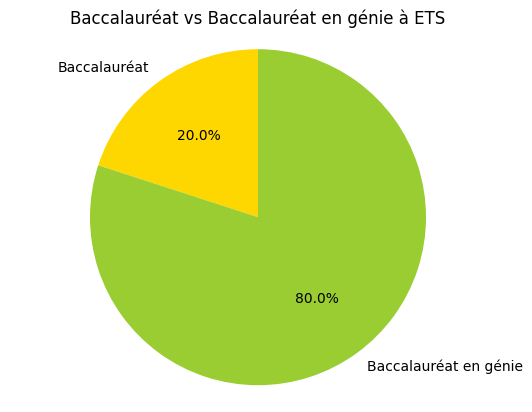

In [314]:
# Create a pie chart using Seaborn
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Baccalauréat vs Baccalauréat en génie à ETS')
plt.show()

In [315]:
# Pie chart
labels = [
    'Baccalauréat', 'Baccalauréat en génie', 
    'Programme court de 2e cycle', 'Micro programmes', 
    'DESS', 'Certificat', 'Maîtrise', 'Doctorat'
]
sizes = [
    bachelor_programs.shape[0], bachelor_genie_programs.shape[0], 
    court_programs.shape[0], micro_programs.shape[0], 
    dess_programs.shape[0], certificat_programs.shape[0], 
    master_programs.shape[0], doctorate_programs.shape[0]
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'purple', 'cyan', 'pink']

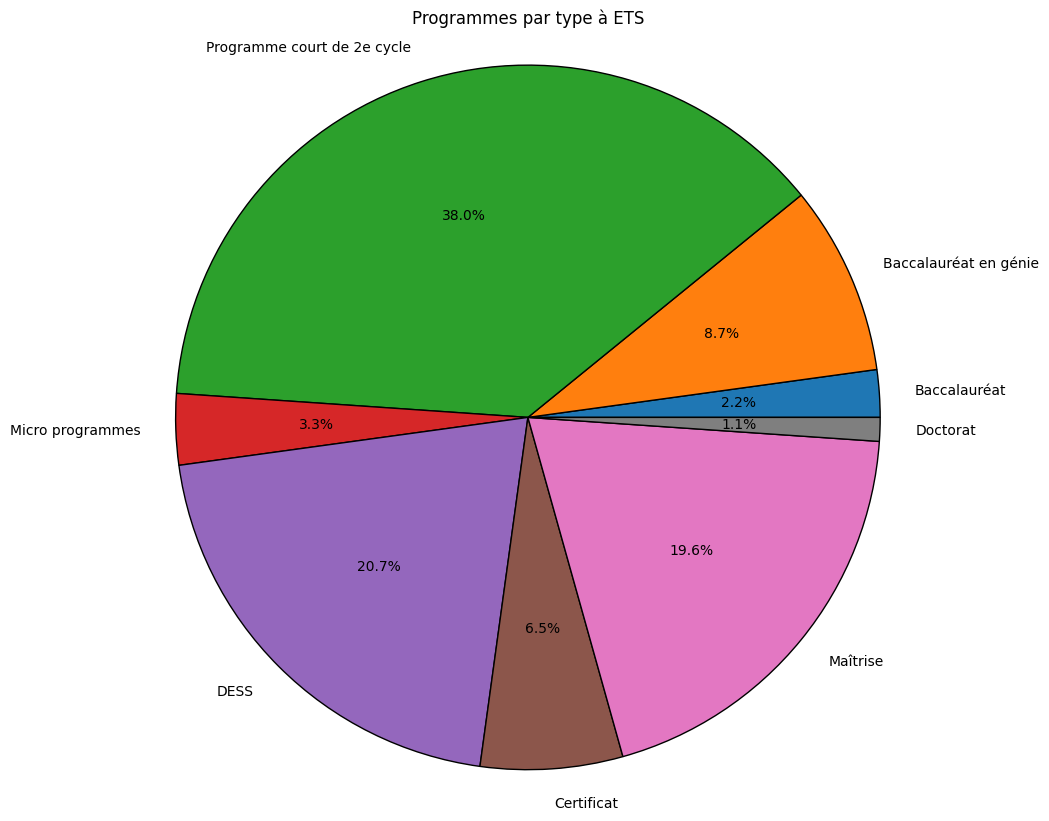

In [316]:
# Create a pie chart using Seaborn
plt.figure(figsize=(10, 10))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    wedgeprops={'edgecolor': 'black'}  # Add borders for better visibility
)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.title('Programmes par type à ETS')
plt.show()

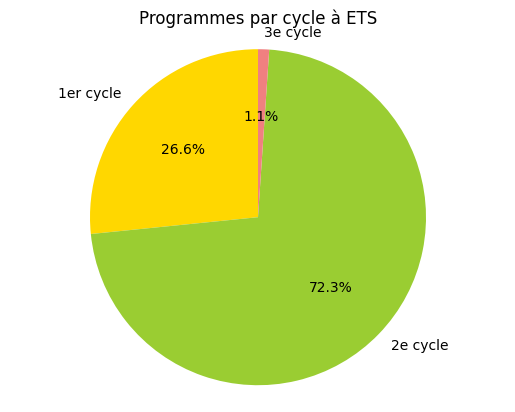

In [317]:
# Pie chart of different programs cycles 1,2,3
labels = ['1er cycle', '2e cycle', '3e cycle']
sizes = [program_df[program_df['cycle'] == 1].shape[0], program_df[program_df['cycle'] == 2].shape[0], program_df[program_df['cycle'] == 3].shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Create a pie chart using Seaborn
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Programmes par cycle à ETS')
plt.show()

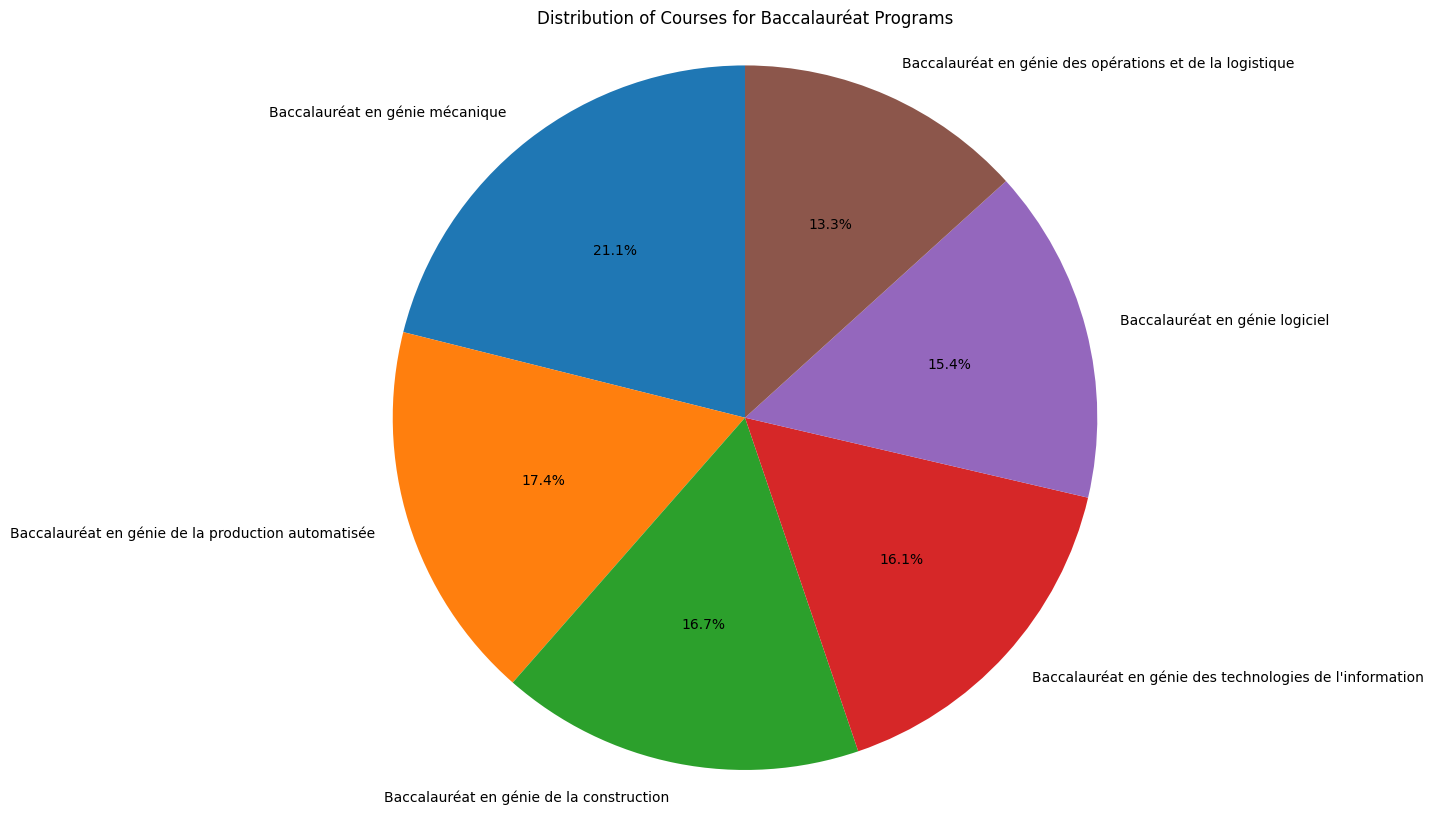

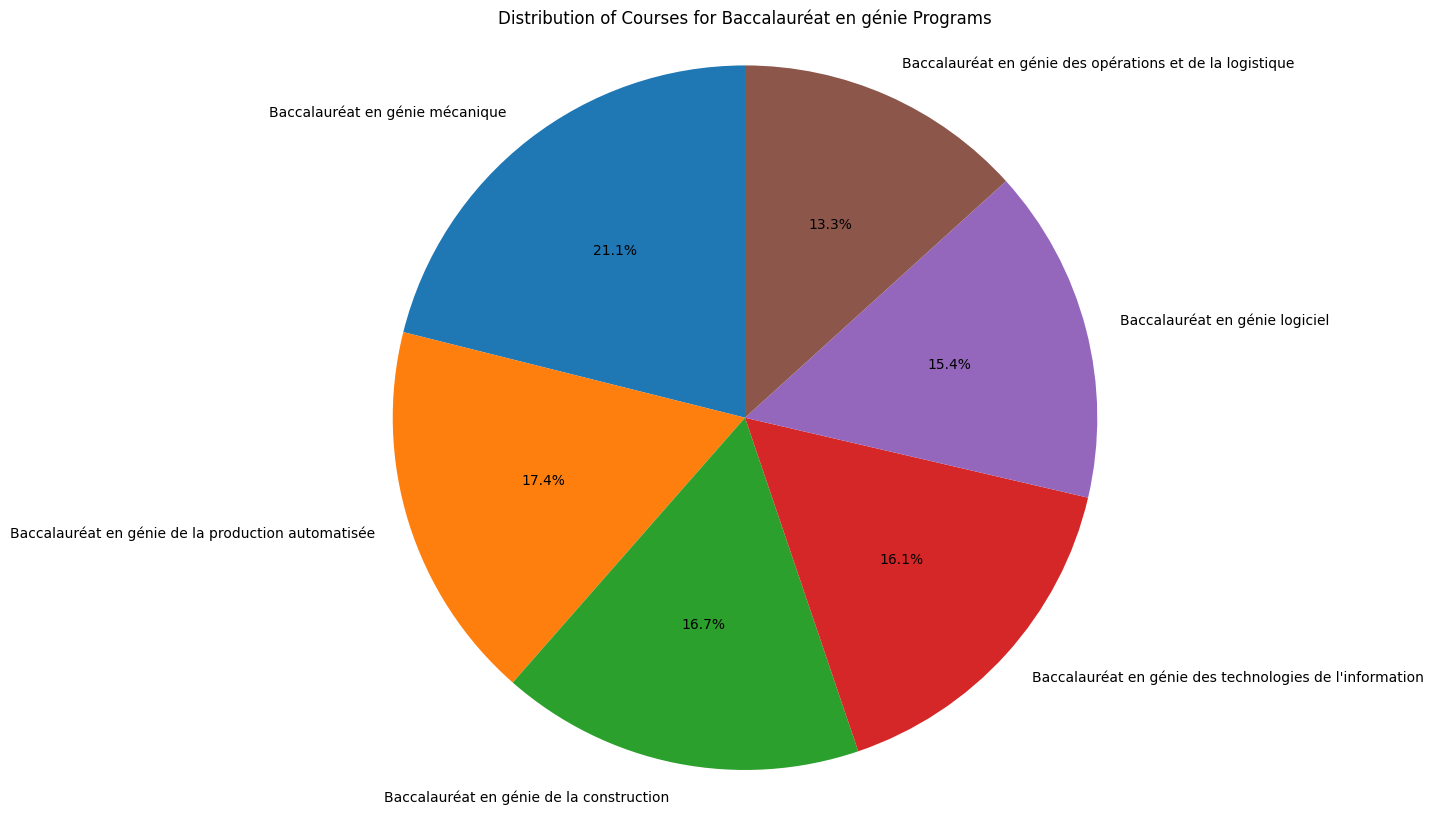

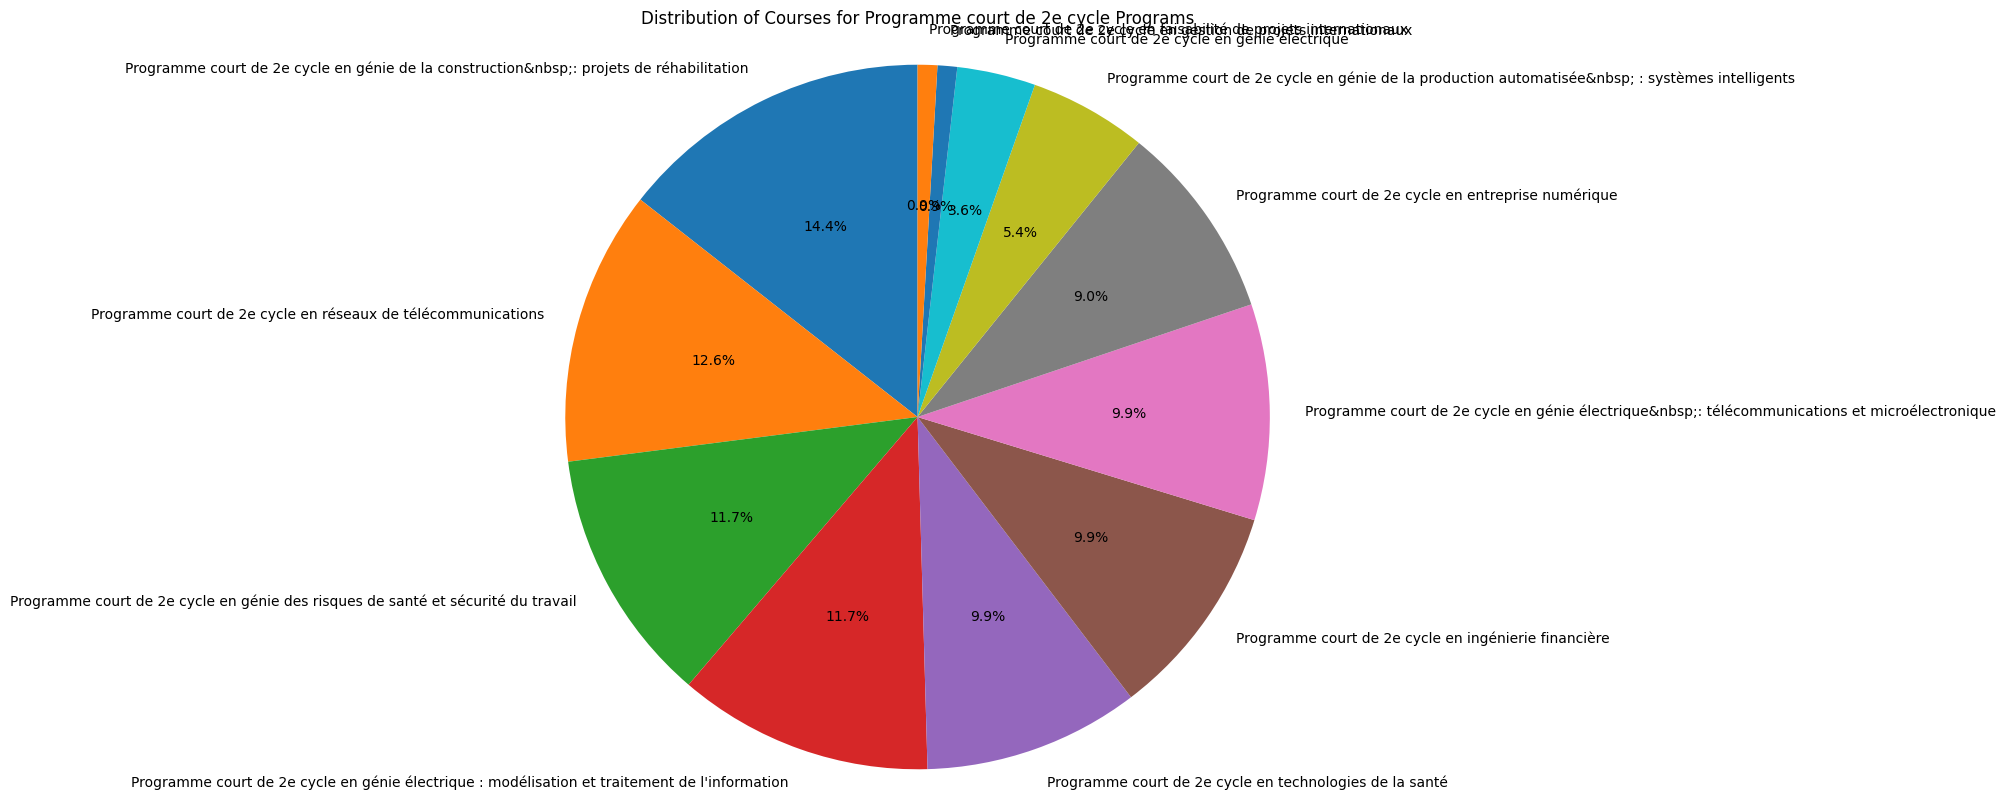

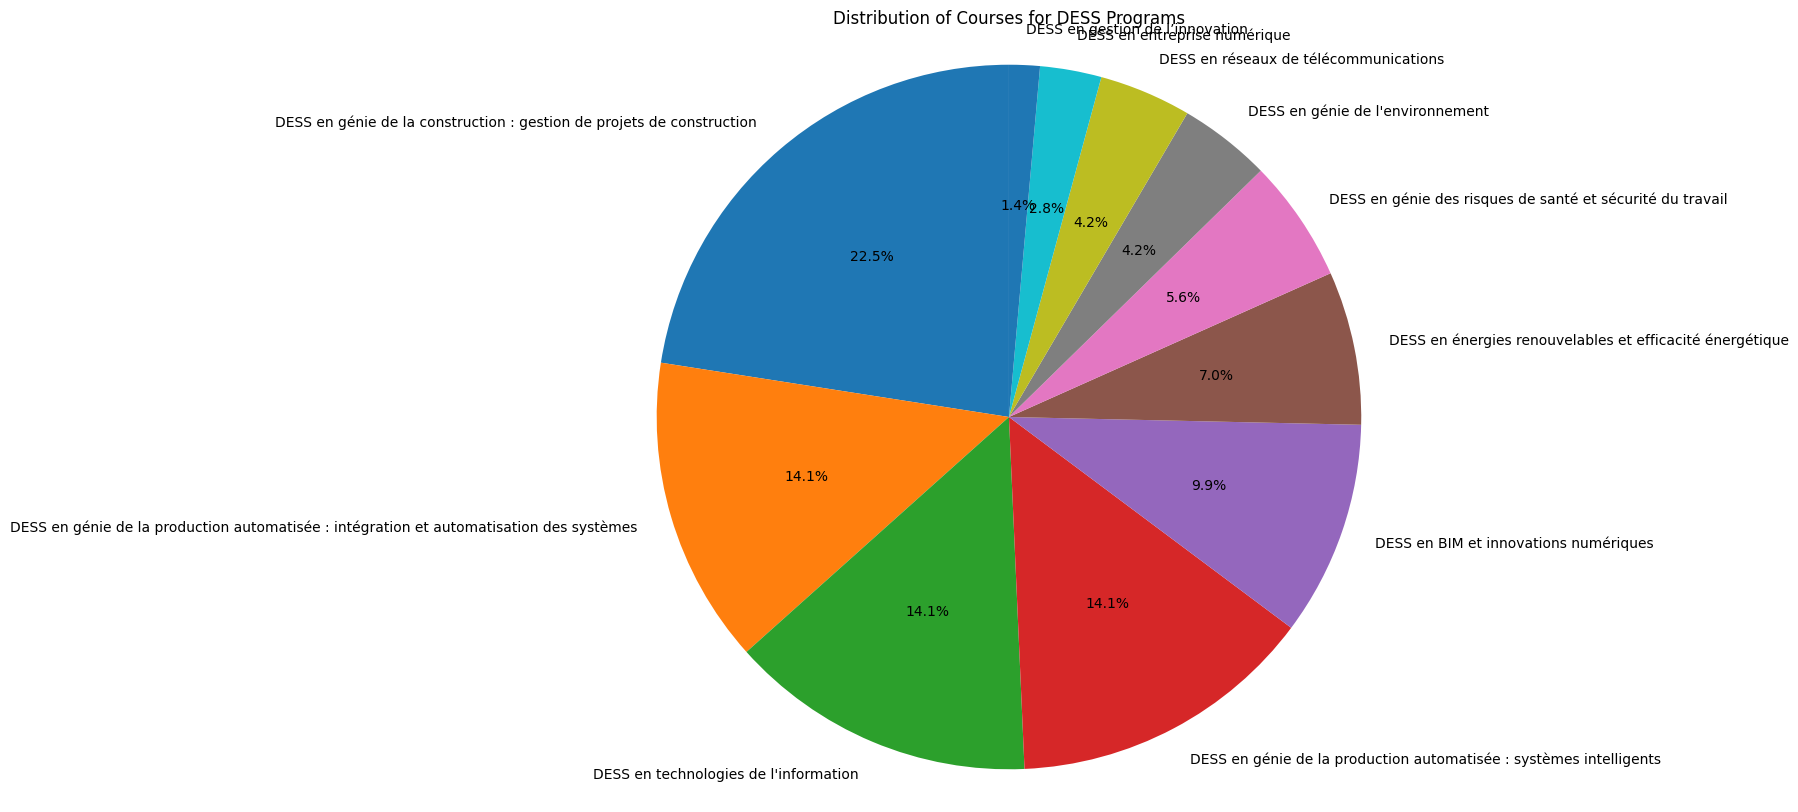

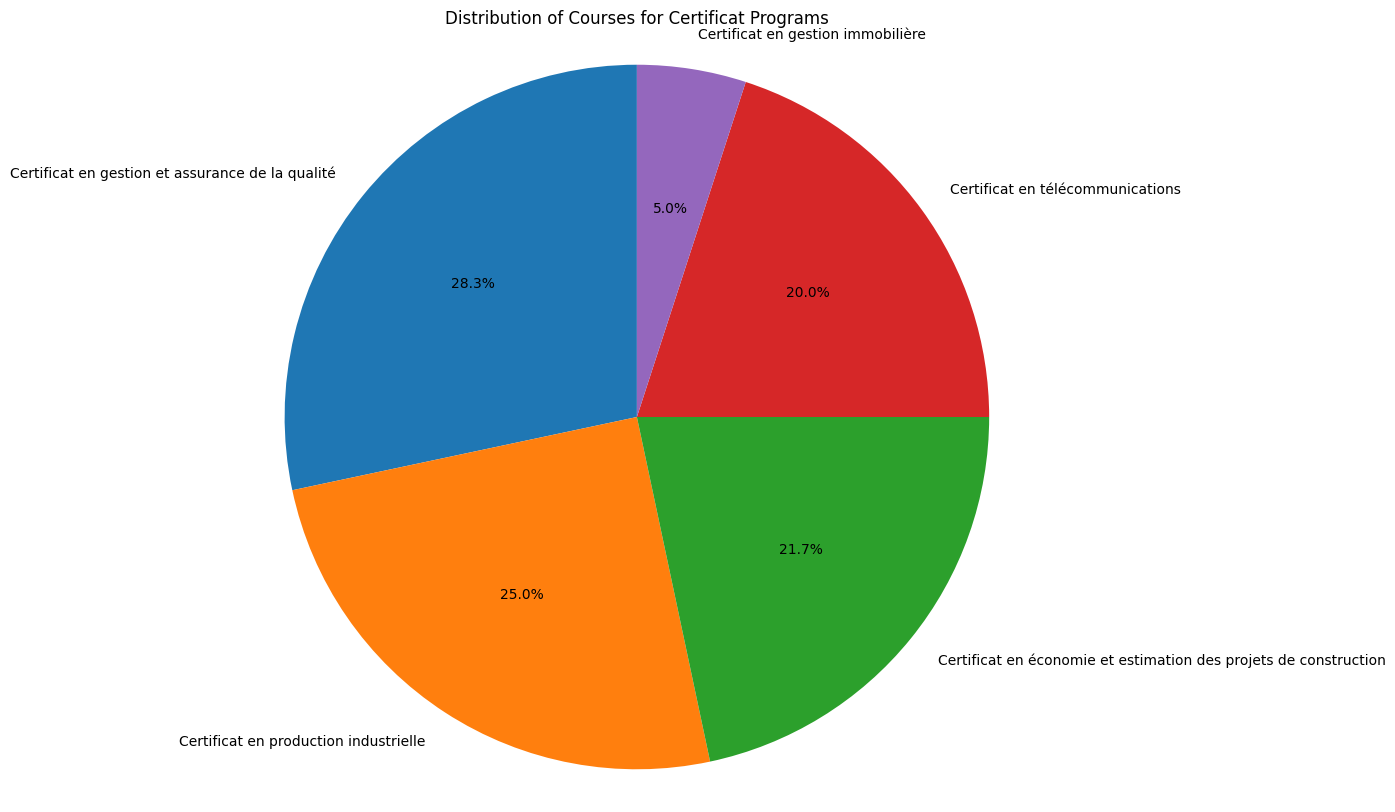

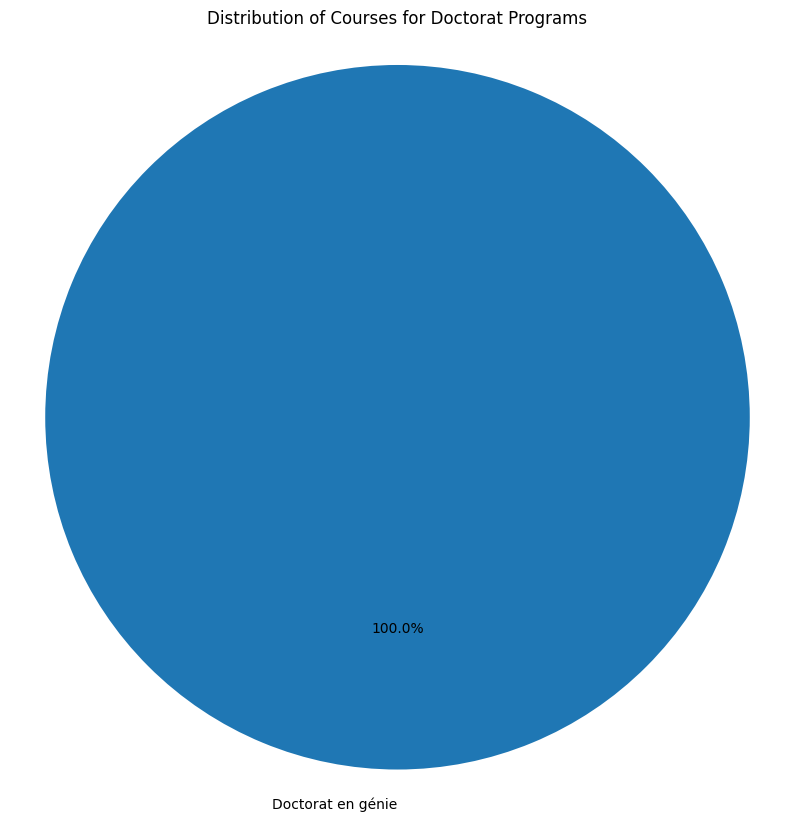

In [318]:
# Group by programId and count the number of unique courseIds for each program
courses_per_program = combined_df.groupby('programId').agg(
    num_courses=('courseId', 'nunique'),  # Count unique course IDs
    program_title=('title_program', 'first')  # Get the program title
).reset_index()

# Sort by the number of courses in descending order
courses_per_program = courses_per_program.sort_values(by='num_courses', ascending=False)

program_types = [
    'Baccalauréat', 'Baccalauréat en génie', 
    'Programme court de 2e cycle', 'Micro programmes', 
    'DESS', 'Certificat', 'Maîtrise', 'Doctorat'
]

# Generate separate pie charts for each program type based on their courses
for program_type in program_types:
    # Filter programs matching the current program type
    filtered_programs = courses_per_program[courses_per_program['program_title'].str.contains(
        program_type, case=False, na=False
    )]
    
    # Skip if no data for this program type
    if filtered_programs.empty:
        continue

    # Prepare data for the pie chart
    labels = filtered_programs['program_title']
    sizes = filtered_programs['num_courses']

    # Generate the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab10.colors
    )
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.title(f'Distribution of Courses for {program_type} Programs')
    plt.show()

In [486]:
# Df shared between programs
shared_programs = []

# Filter for courses shared between more than one program
if 'courseId' in program_course_df.columns and 'id' in course_df.columns and 'title' in course_df.columns and 'programId' in program_course_df.columns:
    # Find common courses based on their IDs
    common_courses = set(program_course_df['courseId']).intersection(set(course_df['id']))

    # Extract titles of the common courses
    common_course_titles = course_df[course_df['id'].isin(common_courses)][['id', 'title']]

    print("Programs Sharing Common Courses (More than One Program):")
    for _, course in common_course_titles.iterrows():
        course_id = course['id']
        course_title = course['title']

        # Find programs associated with this course
        programs_for_course = program_course_df[program_course_df['courseId'] == course_id]['programId'].unique()

        # Check if the course is shared by more than one program
        if len(programs_for_course) > 1:
            # Get program titles
            program_titles = program_df[program_df['id'].isin(programs_for_course)]['title'].tolist()

            # Print course title and associated programs
            print(f"\nCourse: {course_title}")
            print("Programs:")
            for program_title in program_titles:
                print(f" - {program_title}")

            shared_programs.append({
                'courseId': course_id,
                'title': course_title,
                'programIds': programs_for_course,
                'program_titles': program_titles
            })
    
else:
    print("Required columns ('courseId', 'id', 'title', 'programId') are missing or misnamed.")

Programs Sharing Common Courses (More than One Program):

Course: Acoustique industrielle
Programs:
 - Baccalauréat en génie mécanique
 - DESS en génie des risques de santé et sécurité du travail

Course: Apprentissage machine quantique
Programs:
 - Baccalauréat en génie logiciel
 - Baccalauréat en génie des technologies de l'information

Course: Compléments de mathématiques (profil génie électrique)
Programs:
 - Programme court de 2e cycle en génie électrique : modélisation et traitement de l'information
 - Programme court de 2e cycle en réseaux de télécommunications
 - Programme court de 2e cycle en technologies de la santé
 - Programme court de 2e cycle en génie électrique&nbsp;: télécommunications et microélectronique

Course: Architecture logicielle
Programs:
 - Baccalauréat en génie logiciel
 - Baccalauréat en génie des technologies de l'information

Course: Apprentissage machine avancé
Programs:
 - Baccalauréat en génie logiciel
 - Baccalauréat en génie des technologies de l'inf

In [487]:
# What are the most shared programs sor by most program (programIds is array of programs)
shared_programs = pd.DataFrame(shared_programs)
shared_programs['Num_Programs'] = shared_programs['programIds'].apply(len)
shared_programs = shared_programs.sort_values(by='Num_Programs', ascending=False)
print(shared_programs.shape[0])
shared_programs

136


courseId                                              title  \
57    349682                           Intégrité intellectuelle   
113   787696                Règles de base en santé et sécurité   
42    349684  Intégrité intellectuelle : un savoir-être et s...   
101   787886                Règles de base en santé et sécurité   
72    351053                  Analyse de rentabilité de projets   
..       ...                                                ...   
50    352197                      Dossier électronique de santé   
49    350912                          Estimation et soumissions   
48    350207              Estimation budgétaire en construction   
47    350974  Algorithmiques et intelligence artificielle en...   
135   350984       Techniques avancées en ingénierie financière   

                                            programIds  \
57   [182984, 183000, 183008, 183024, 182880, 18284...   
113  [183000, 183008, 183024, 182880, 182848, 18301...   
42   [183206, 183306, 396036, 391265, 183216, 18338...   
101  [183206, 183306, 396036, 391265, 183216, 18338...   
72   [182984, 183024, 182880, 182848, 183016, 18291...   
..                                                 ...   
50                                    [182896, 182864]   
49                                    [183008, 182952]   
48                                    [183008, 182952]   
47                                    [396036, 183276]   
135                                   [396036, 183276]   

                                        program_titles  Num_Programs  
57   [Certificat en production industrielle, Progra...            15  
113  [Programme court en économie et estimation des...            14  
42   [Programme court de 2e cycle en génie électriq...             9  
101  [Programme court de 2e cycle en génie électriq...             9  
72   [Certificat en production industrielle, Baccal...             8  
..                                                 ...           ...  
50   [Baccalauréat en génie mécanique, Baccalauréat...             2  
49   [Programme court en économie et estimation des...             2  
48   [Programme court en économie et estimation des...             2  
47   [Microprogramme de 2e cycle en ingénierie créa...             2  
135  [Microprogramme de 2e cycle en ingénierie créa...             2  

[136 rows x 5 columns]

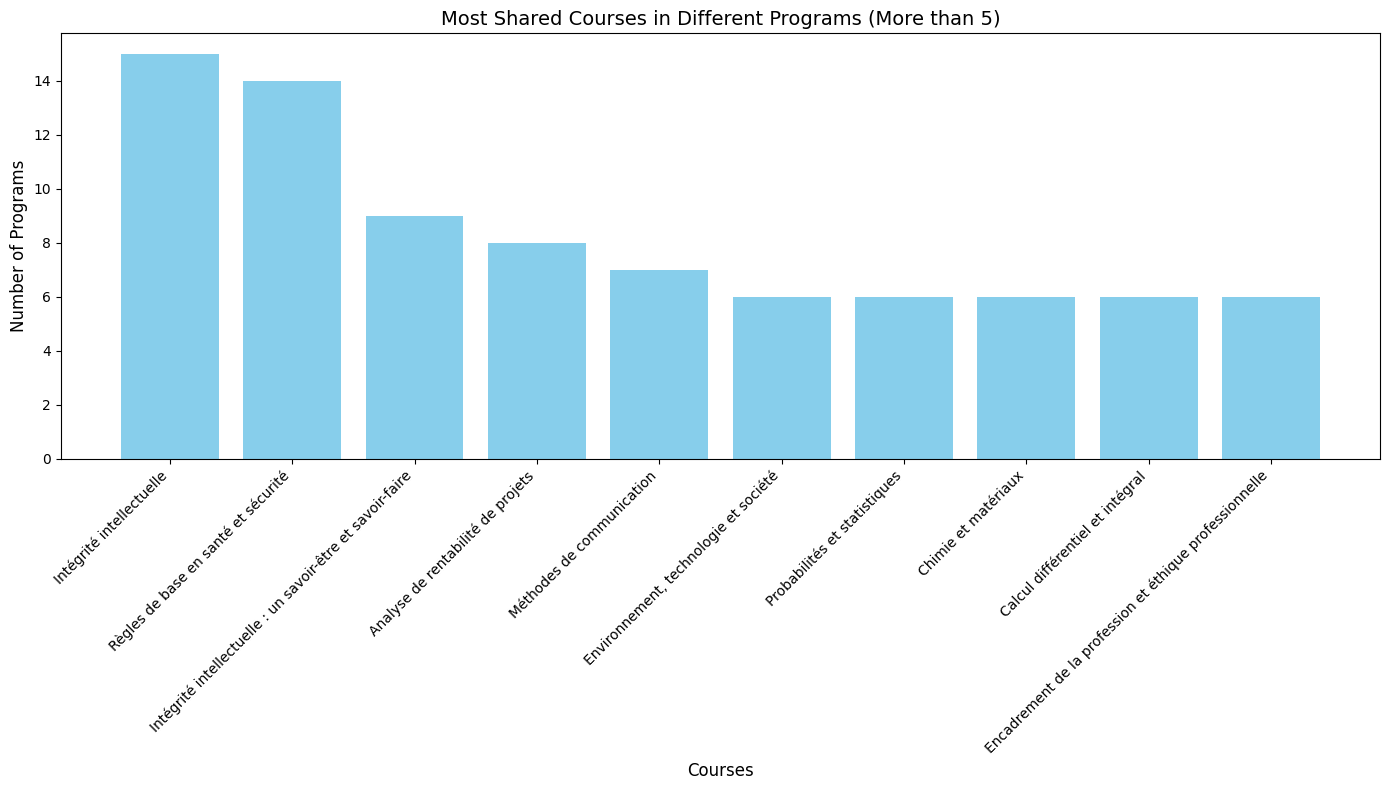

In [488]:
# Filter for programs with more than 10 courses
filtered_shared_programs = shared_programs[shared_programs['Num_Programs'] > 5]

# Plot a histogram of the most shared programs
plt.figure(figsize=(14, 8))
plt.bar(filtered_shared_programs['title'], filtered_shared_programs['Num_Programs'], color='skyblue')
plt.xlabel('Courses', fontsize=12)
plt.ylabel('Number of Programs', fontsize=12)
plt.title('Most Shared Courses in Different Programs (More than 5)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

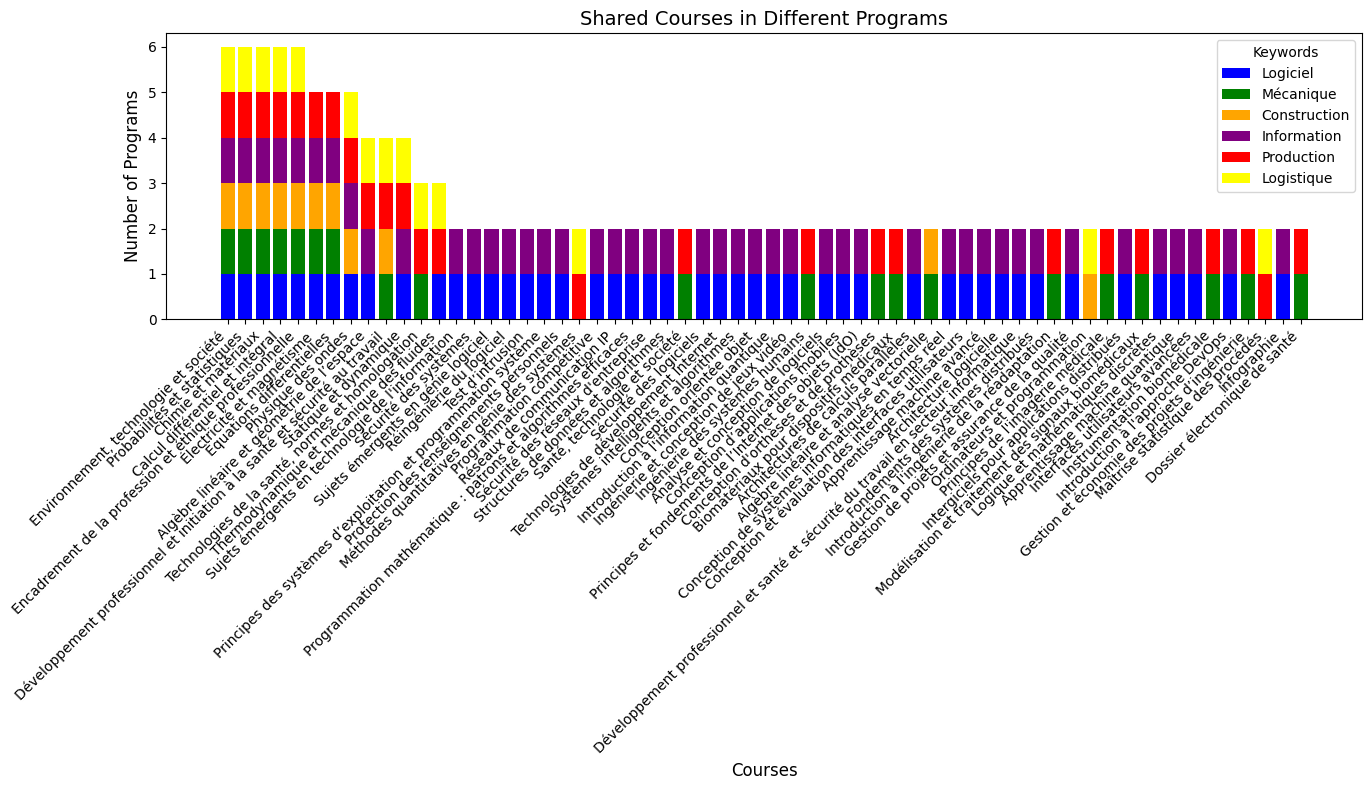

In [489]:
# for the bac programs
filtered_shared_programs = shared_programs[
    ~shared_programs['program_titles'].apply(lambda titles: any("dess" in title.lower() or "maîtrise" in title.lower() or "court" in title.lower() for title in titles)) ]
    
import matplotlib.colors as mcolors
import numpy as np

# Define color mapping for specific keywords
color_map = {
    "logiciel": "blue",
    "mécanique": "green",
    "construction": "orange",
    "information": "purple",
    "production": "red",
    "logistique": "yellow",
}

# Prepare data for stacked bar plot
keywords = list(color_map.keys())
stacked_data = {keyword: [] for keyword in keywords}

# Fill stacked data with the counts for each keyword
for index, row in filtered_shared_programs.iterrows():
    counts = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        counts[keyword] = sum(keyword in title.lower() for title in row['program_titles'])
    for keyword in keywords:
        stacked_data[keyword].append(counts[keyword])

# Convert stacked data into numpy arrays for plotting
stacked_values = np.array([stacked_data[keyword] for keyword in keywords])

# Create the stacked bar plot
x = np.arange(len(filtered_shared_programs['title']))  # X positions
bottoms = np.zeros(len(filtered_shared_programs))  # Bottom positions for stacking

plt.figure(figsize=(14, 8))
for i, keyword in enumerate(keywords):
    plt.bar(
        x,
        stacked_values[i],
        bottom=bottoms,
        color=color_map[keyword],
        label=keyword.capitalize()
    )
    bottoms += stacked_values[i]

plt.xlabel('Courses', fontsize=12)
plt.ylabel('Number of Programs', fontsize=12)
plt.title('Shared Courses in Different Programs', fontsize=14)
plt.xticks(x, filtered_shared_programs['title'], rotation=45, ha='right', fontsize=10)
plt.legend(title="Keywords", loc="upper right")
plt.tight_layout()
plt.show()

In [492]:
# shared_programs['title'] str contains "dossier" give the title of the course
new_df = shared_programs[shared_programs['title'].str.contains("Dossier", case=False, na=False)]
new_df

courseId                          title        programIds  \
50   352197  Dossier électronique de santé  [182896, 182864]   

                                       program_titles  Num_Programs  
50  [Baccalauréat en génie mécanique, Baccalauréat...             2

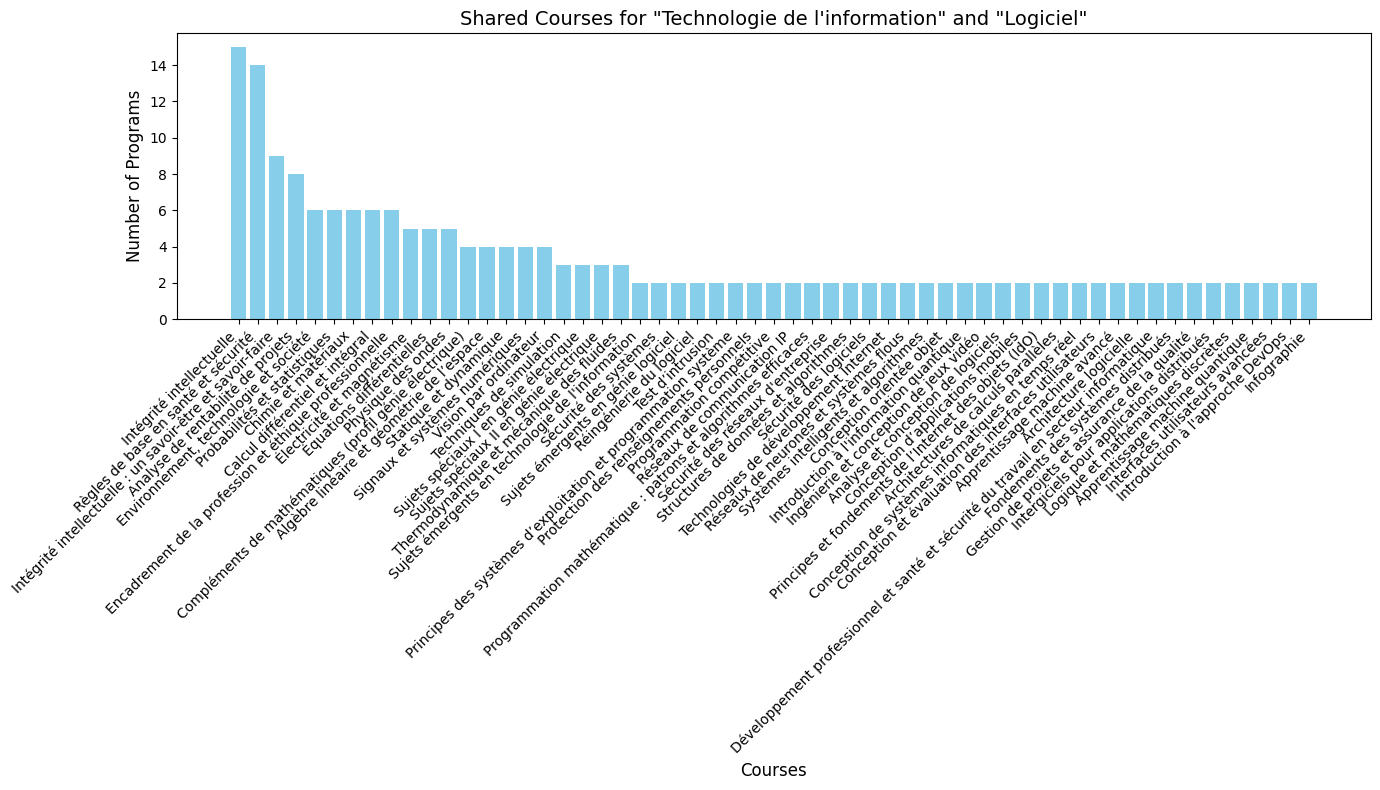

In [471]:
# Filter for courses related to "information" and "Logiciel" in program_titles
filtered_courses = shared_programs[
    shared_programs['program_titles'].apply(lambda titles: any("information" in title.lower() or "logiciel" in title.lower() for title in titles))
]

# Plot a histogram for shared courses related to these programs
plt.figure(figsize=(14, 8))
plt.bar(filtered_courses['title'], filtered_courses['Num_Programs'], color='skyblue')
plt.xlabel('Courses', fontsize=12)
plt.ylabel('Number of Programs', fontsize=12)
plt.title('Shared Courses for "Technologie de l\'information" and "Logiciel"', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [472]:
# Filter for courses related to "information" and "Logiciel" in program_titles only by those programs
    # print only course with logiciel or information in title and that only shared those programs
filtered_courses = shared_programs[
    shared_programs['program_titles'].apply(lambda titles: any("information" in title.lower() or "logiciel" in title.lower() for title in titles))
]

# remove duplicates and programs that contain more than 2 programs
filtered_courses = filtered_courses.drop_duplicates(subset=['courseId', 'title'], keep='first')
filtered_courses = filtered_courses[
    ~filtered_courses['program_titles'].apply(lambda titles: any("dess" in title.lower() or "maîtrise" in title.lower() or "court" in title.lower() for title in titles)) ]
filtered_courses = filtered_courses[filtered_courses['Num_Programs'] < 3]
filtered_courses

courseId                                              title  \
122   352127   Sujets émergents en technologie de l'information   
87    351979                              Sécurité des systèmes   
129   352595                 Sujets émergents en génie logiciel   
91    352491                           Réingénierie du logiciel   
133   352035                                   Test d’intrusion   
93    352549  Principes des systèmes d’exploitation et progr...   
86    352029           Protection des renseignements personnels   
94    352531                          Programmation compétitive   
96    351971                        Réseaux de communication IP   
98    351901  Programmation mathématique : patrons et algori...   
116   352021                  Sécurité des réseaux d'entreprise   
112   352429               Structures de données et algorithmes   
111   352473                             Sécurité des logiciels   
118   351957             Technologies de développement Internet   
115   352507               Systèmes intelligents et algorithmes   
23    352405                          Conception orientée objet   
35    351989             Introduction à l'information quantique   
34    352567             Ingénierie et conception de jeux vidéo   
25    352413                 Analyse et conception de logiciels   
18    352465                  Conception d’applications mobiles   
79    352005  Principes et fondements de l’Internet des obje...   
9     352517                Architectures de calculs parallèles   
6     352499  Conception de systèmes informatiques en temps ...   
5     351911  Conception et évaluation des interfaces utilis...   
4     352099                       Apprentissage machine avancé   
3     352457                            Architecture logicielle   
40    787703  Développement professionnel et santé et sécuri...   
41    352579                 Fondements des systèmes distribués   
44    351939      Gestion de projets et assurance de la qualité   
71    352559          Intergiciels pour applications distribués   
69    352637                 Logique et mathématiques discrètes   
1     352077                    Apprentissage machine quantique   
66    352057                   Interfaces utilisateurs avancées   
60    352539                   Introduction à l'approche DevOps   
56    352587                                        Infographie   

           programIds                                     program_titles  \
122  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
87   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
129  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
91   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
133  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
93   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
86   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
94   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
96   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
98   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
116  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
112  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
111  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
118  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
115  [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
23   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
35   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
34   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
25   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ...   
18   [182848, 182912]  [Baccalauréat en génie logiciel, Baccalauréat ..

In [406]:

filtered_courses = shared_programs[
    shared_programs['program_titles'].apply(lambda titles: any("mécanique" in title.lower() or "construction" in title.lower() for title in titles))
]

# Ordinateurs et programmation error

# remove duplicates and programs that contain more than 2 programs
filtered_courses = filtered_courses.drop_duplicates(subset=['courseId', 'title'], keep='first')
# drop programs with DESS or Matrise or Court program_titles is 
filtered_courses = filtered_courses[
    ~filtered_courses['program_titles'].apply(lambda titles: any("dess" in title.lower() or "maîtrise" in title.lower() or "court" in title.lower() for title in titles))]
filtered_courses = filtered_courses[filtered_courses['Num_Programs'] < 3]
filtered_courses

courseId                                              title  \
100   354044                      Santé, technologie et société   
33    352143                    Ingénierie des systèmes humains   
17    352173              Conception d'orthèses et de prothèses   
13    352191             Biomatériaux pour dispositifs médicaux   
8     352629            Algèbre linéaire et analyse vectorielle   
43    352161     Introduction à l'ingénierie de la réadaptation   
77    352353                       Ordinateurs et programmation   
76    352167                   Principes de l'imagerie médicale   
70    352179  Modélisation et traitement des signaux biomédi...   
63    352185                        Instrumentation biomédicale   
59    351059       Gestion et économie des projets d’ingénierie   
50    352197                      Dossier électronique de santé   

           programIds                                     program_titles  \
100  [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
33   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
17   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
13   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
8    [182816, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
43   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
77   [182880, 182816]  [Baccalauréat en génie des opérations et de la...   
76   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
70   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
63   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
59   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   
50   [182896, 182864]  [Baccalauréat en génie mécanique, Baccalauréat...   

     Num_Programs  
100             2  
33              2  
17              2  
13              2  
8               2  
43              2  
77              2  
76              2  
70              2  
63              2  
59              2  
50              2

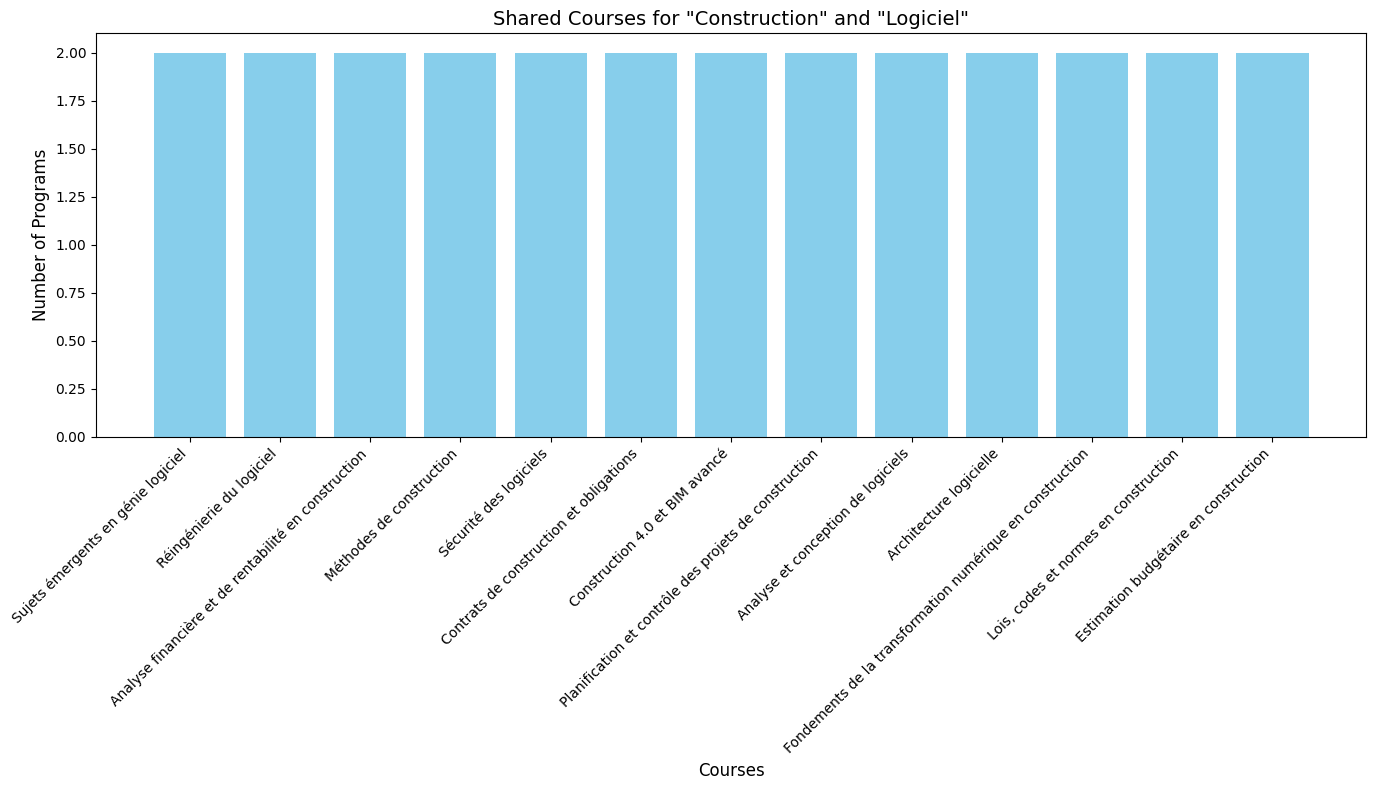

In [400]:
# Filter for programs related to construction|mecanique
filtered_4_courses = shared_programs[
    shared_programs['title'].str.contains("construction|logiciel", case=False, na=False)
]

# Plot a histogram for shared courses related to these programs
plt.figure(figsize=(14, 8))
plt.bar(filtered_4_courses['title'], filtered_4_courses['Num_Programs'], color='skyblue')
plt.xlabel('Courses', fontsize=12)
plt.ylabel('Number of Programs', fontsize=12)
plt.title('Shared Courses for "Construction" and "Logiciel"', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()